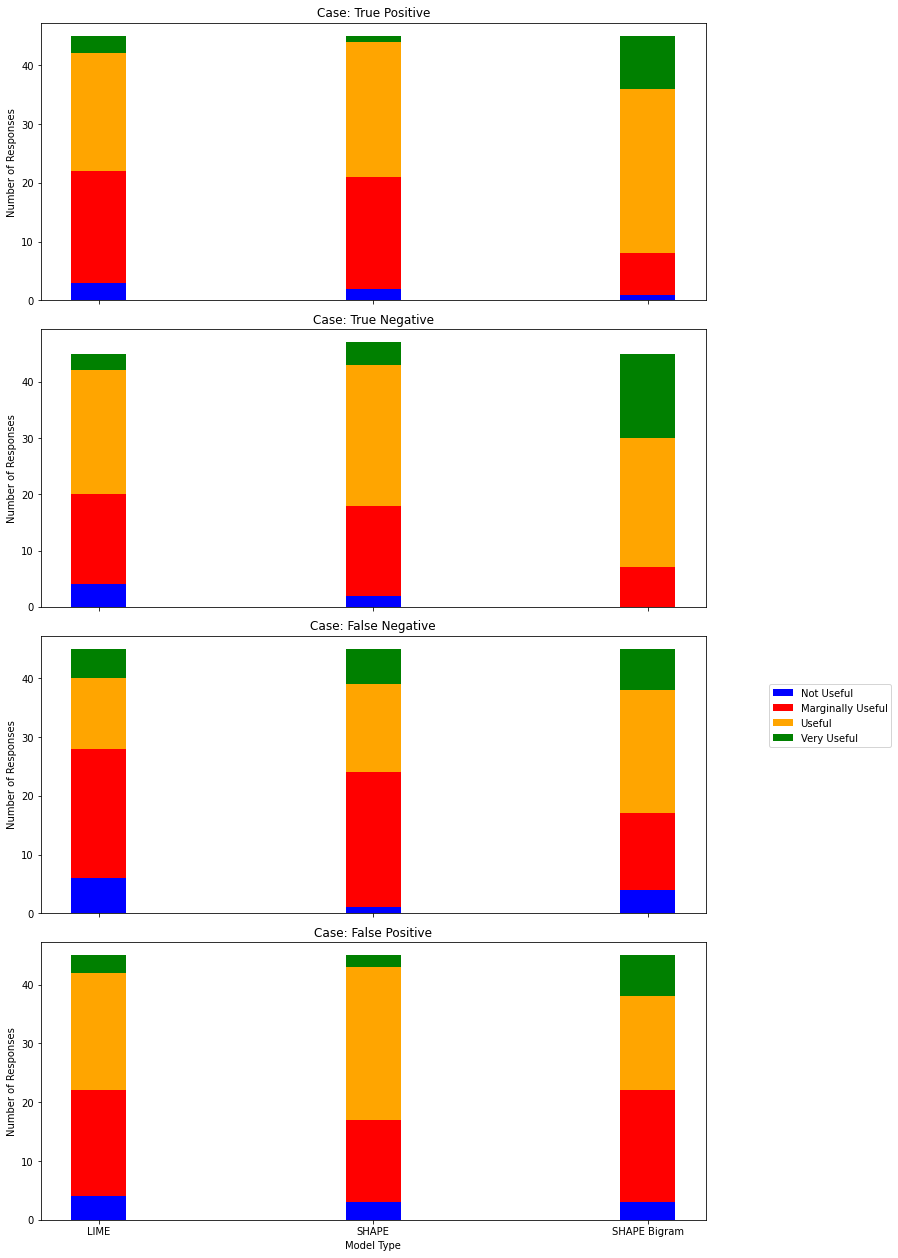

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
cases = ['True Positive', 'True Negative', 'False Negative', 'False Positive']
models = ['LIME', 'SHAPE', 'SHAPE Bigram', 'LIME', 'SHAPE', 'SHAPE Bigram', 'LIME', 'SHAPE', 'SHAPE Bigram', 'LIME', 'SHAPE', 'SHAPE Bigram']
not_useful = [3, 2, 1, 4, 2, 0, 6, 1, 4, 4, 3, 3]
marginally_useful = [19, 19, 7, 16, 16, 7, 22, 23, 13, 18, 14, 19]
useful = [20, 23, 28, 22, 25, 23, 12, 15, 21, 20, 26, 16]
very_useful = [3, 1, 9, 3, 4, 15, 5, 6, 7, 3, 2, 7]

# Combine data for plotting
data = np.array([not_useful, marginally_useful, useful, very_useful]).T

# Number of groups
num_groups = len(cases)  # 4 groups

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Colors for each category
colors = ['blue', 'red', 'orange', 'green']

# Plot each case
for idx, ax in enumerate(axs):
    ax.bar(models[idx*3:(idx+1)*3], data[idx*3:(idx+1)*3, 0], color=colors[0], label='Not Useful', width=0.2)
    ax.bar(models[idx*3:(idx+1)*3], data[idx*3:(idx+1)*3, 1], bottom=data[idx*3:(idx+1)*3, 0], color=colors[1], label='Marginally Useful', width=0.2)
    ax.bar(models[idx*3:(idx+1)*3], data[idx*3:(idx+1)*3, 2], bottom=data[idx*3:(idx+1)*3, 0] + data[idx*3:(idx+1)*3, 1], color=colors[2], label='Useful', width=0.2)
    ax.bar(models[idx*3:(idx+1)*3], data[idx*3:(idx+1)*3, 3], bottom=data[idx*3:(idx+1)*3, 0] + data[idx*3:(idx+1)*3, 1] + data[idx*3:(idx+1)*3, 2], color=colors[3], label='Very Useful', width=0.2)
    ax.set_title(f'Case: {cases[idx]}')
    ax.set_ylabel('Number of Responses')

# Setting the legend outside the plot to prevent blocking
fig.legend(labels=['Not Useful', 'Marginally Useful', 'Useful', 'Very Useful'], loc='center right', bbox_to_anchor=(1.25, 0.5))

# Set the x-axis label
plt.xticks(ticks=np.arange(3), labels=['LIME', 'SHAPE', 'SHAPE Bigram'])
plt.xlabel('Model Type')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Adjust the bottom to make space for the legend

# Show plot
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrames for each method
data_contrastive_learning = pd.DataFrame({
    'Dataset': ['Jeyaraman_2020', 'Radjenovic_2013', 'Smid_2020', 'Hall_2012'],
    'MCC': [0.90, 0.79, 0.75, 0.69],
    'Accuracy': [0.93, 0.86, 0.82, 0.84],
    'F1-score': [0.91, 0.79, 0.78, 0.71],
    'Precision': [0.84, 0.63, 0.57, 0.50],
    'Recall': [0.87, 0.73, 0.64, 0.70]
})

data_logistic_regression = pd.DataFrame({
    'Dataset': ['Jeyaraman_2020', 'Radjenovic_2013', 'Smid_2020', 'Hall_2012'],
    'MCC': [0.65, 0.57, 0.32, 0.63],
    'Accuracy': [0.8, 0.76, 0.61, 0.8],
    'F1-score': [0.68, 0.57, 0.3, 0.64],
    'Precision': [0.77, 0.63, 0.48, 0.68],
    'Recall': [0.62, 0.53, 0.23, 0.61]
})

data_svm = pd.DataFrame({
    'Dataset': ['Jeyaraman_2020', 'Radjenovic_2013', 'Smid_2020', 'Hall_2012'],
    'MCC': [0.71, 0.54, 0.57, 0.64],
    'Accuracy': [0.85, 0.71, 0.71, 0.7],
    'F1-score': [0.74, 0.49, 0.52, 0.59],
    'Precision': [0.78, 0.83, 0.9, 0.99],
    'Recall': [0.72, 0.42, 0.38, 0.42]
})

data_simple_neural_network = pd.DataFrame({
    'Dataset': ['Jeyaraman_2020', 'Radjenovic_2013', 'Smid_2020', 'Hall_2012'],
    'MCC': [0.46, 0.4, 0.23, 0.53],
    'Accuracy': [0.69, 0.65, 0.57, 0.75],
    'F1-score': [0.46, 0.34, 0.2, 0.5],
    'Precision': [0.7, 0.31, 0.4, 0.65],
    'Recall': [0.43, 0.77, 0.14, 0.51]
})

# Combining all data for plotting
data_combined = pd.concat([
    data_contrastive_learning.assign(Method='Contrastive Learning'),
    data_logistic_regression.assign(Method='Logistic Regression'),
    data_svm.assign(Method='SVM'),
    data_simple_neural_network.assign(Method='Simple Neural Network')
])

# Melting the combined DataFrame for easier plotting with seaborn
data_melted = pd.melt(data_combined, id_vars=['Dataset', 'Method'], var_name='Metric', value_name='Value')



In [ ]:
plt.figure(figsize=(20, 10))
catplot = sns.catplot(x='Metric', y='Value', hue='Method', col='Dataset', data=data_melted, kind='bar', height=4, aspect=.7, palette='Spectral')
plt.subplots_adjust(top=0.8)
plt.suptitle('Performance Metrics Across Different Methods and Datasets', fontsize=16)

# Rotating x-axis labels vertically
for ax in catplot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

plt.show()